# Щипицина К.В. ИУ5-22М
## Вариант 11

### Номер задачи №1 - 11
Задача №11.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.
### Номер задачи №2 - 31
Задача №31.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).
### Дополнительное требование
Для произвольной колонки данных построить гистограмму.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Задача №1

In [2]:
data = pd.read_csv("../vgsales.csv")

In [3]:
data.shape

(16598, 11)

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Проведем устранения пропуска для признака "Publisher"  
Введем отдельное значение категории для пропущенных значений. 

Основное преимущество такого подхода состоит в том, что не дается никаких предположений о распределении пропущенных значений.

In [7]:
# Воспользуемся функцией приведенной в лекции
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,))

In [8]:
Data_with_na=data['Publisher']

In [9]:
Publisher_new = impute_column(data, 'Publisher', 'constant', fill_value_param='NA')

In [10]:
data['Publisher']=Publisher_new

In [11]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Устранили пропуски.

In [12]:
print("Количество импьютированных значений: ", data['Publisher'].value_counts()['NA'])

Количество импьютированных значений:  58


In [13]:
data[data.Publisher == 'NA'].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NA,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NA,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NA,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NA,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NA,0.46,0.17,0.0,0.01,0.64


## Задача №2

In [14]:
data = pd.read_csv("../diabetes.csv")

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X=data.drop(['Outcome'], axis=1)
y=data['Outcome']

### Будем использовать класс 'Sequential Feature Selector' (с параметром конструктора forward=True) из библиотеки MLxtend.

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(X, y)

In [18]:
sfs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.67708333, 0.63020833, 0.72916667, 0.72916667]),
  'avg_score': 0.69140625,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.72916667, 0.69270833, 0.74479167, 0.66145833]),
  'avg_score': 0.70703125,
  'feature_names': ('Glucose', 'BMI')},
 3: {'feature_idx': (1, 5, 7),
  'cv_scores': array([0.69270833, 0.67708333, 0.765625  , 0.73958333]),
  'avg_score': 0.7187500000000001,
  'feature_names': ('Glucose', 'BMI', 'Age')},
 4: {'feature_idx': (1, 3, 5, 7),
  'cv_scores': array([0.71875   , 0.67708333, 0.79166667, 0.71875   ]),
  'avg_score': 0.7265625,
  'feature_names': ('Glucose', 'SkinThickness', 'BMI', 'Age')}}

In [19]:
print("Отобранные признаки: ", str(sfs1.k_feature_names_)[1:-1])

Отобранные признаки:  'Glucose', 'SkinThickness', 'BMI', 'Age'


In [20]:
print("Оценка для выбранных признаков: ", sfs1.k_score_)

Оценка для выбранных признаков:  0.7265625


### SFS и GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend

knn1 = KNeighborsClassifier()

sfs1 = SFS(estimator=knn1, 
           k_features=4,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=4)

pipe = Pipeline([('sfs', sfs1), 
                 ('knn1', knn1)])

param_grid = {
    'sfs__k_features': [1, 2, 3, 4],
    'sfs__estimator__n_neighbors': [2, 3, 4]
  }

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=4,
                  refit=False)

# run gridearch
gs = gs.fit(X, y)

In [22]:
for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 1} test acc.: 0.6888020833333334
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 2} test acc.: 0.7200520833333334
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 3} test acc.: 0.7161458333333334
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 4} test acc.: 0.7005208333333334
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 1} test acc.: 0.6888020833333334
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 2} test acc.: 0.7200520833333334
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 3} test acc.: 0.7161458333333334
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 4} test acc.: 0.7005208333333334
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 1} test acc.: 0.6888020833333334
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 2} test acc.: 0.7200520833333334
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 3} test acc.: 0.7161458333333334
{'sfs__estimator__n_neighbors': 4, 'sfs__k_

In [23]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 2}


### Дополнительное требование

Построим гистограммы для признака "Glucose"

In [24]:
#Диабет
out_yes=data[data['Outcome'] == 1]

In [25]:
#Нет диабета
out_no=data[data['Outcome'] == 0]

Text(0.5, 1.0, 'Уровень глюкозы при диабете')

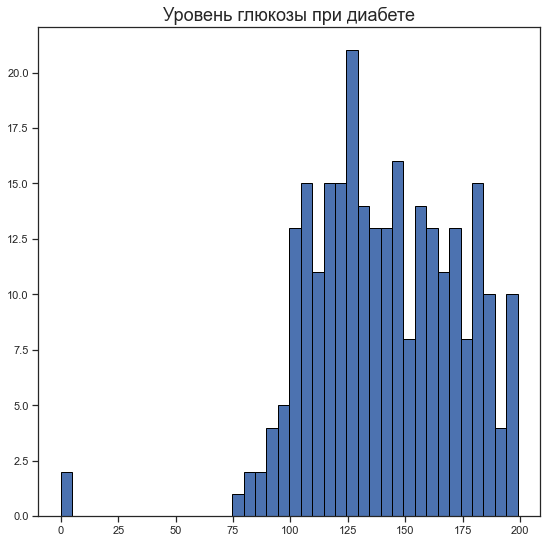

In [26]:
fig, ax = plt.subplots(figsize = (9, 9))
#plot
ax.hist(out_yes["Glucose"], bins=40, edgecolor="black");
plt.title('Уровень глюкозы при диабете', fontsize=18)

Text(0.5, 1.0, 'Уровень глюкозы при отсутствии диабета')

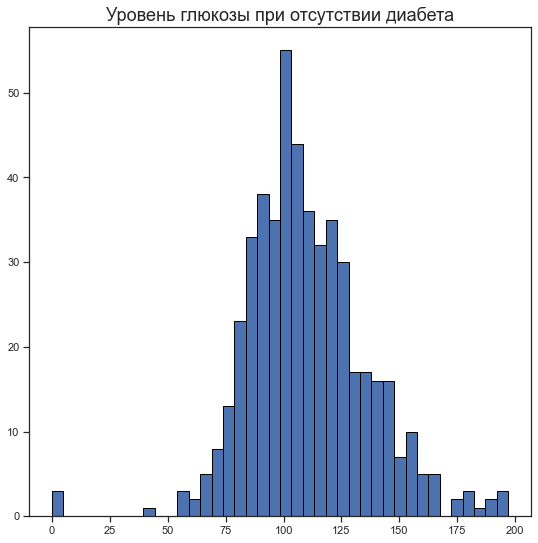

In [27]:
fig, ax = plt.subplots(figsize = (9, 9))
#plot
ax.hist(out_no["Glucose"], bins=40, edgecolor="black");
plt.title('Уровень глюкозы при отсутствии диабета', fontsize=18)